In [20]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# heirarchical custering

In [3]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\bharath's file\DS\csv\crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df = data.drop(['Unnamed: 0'],axis = 1)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm = norm_func(df)

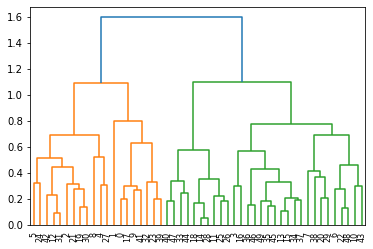

In [7]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [8]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [9]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [10]:
h_clusterid = pd.DataFrame(y_hc)
df_norm['h_clusterid'] = Clusters


In [11]:
df['h_clusterid'] = Clusters
df

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [12]:
result = df.groupby(df.h_clusterid).mean()
result

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,5.715000,132.300000,70.800000,18.100000
1,10.883333,256.916667,78.333333,32.250000
2,3.180000,78.700000,49.300000,11.630000
3,14.671429,251.285714,54.285714,21.685714
4,10.000000,263.000000,48.000000,44.500000


# K-means

In [15]:
cd = pd.read_csv(r"C:\Users\DELL\Desktop\bharath's file\DS\csv\crime_data.csv")
cd.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
cdf = cd.drop(['Unnamed: 0'],axis = 1)
cdf.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [17]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
df_norm = norm_func(cdf)
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [25]:

import sklearn.cluster
import scipy.spatial.distance as ssd
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = sklearn.cluster.KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(ssd.cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([16.96661211]),
 array([14.59566832]),
 array([12.75151399]),
 array([11.71740197]),
 array([11.20037384]),
 array([10.57282361])]

([<matplotlib.axis.XTick at 0x1f4318b38c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

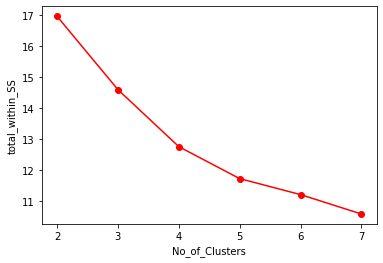

In [26]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)    # K = 4 or 5

In [27]:

kmeans_clust = sklearn.cluster.KMeans(n_clusters=5)
kmeans_clust.fit(df_norm)
kmeans_clust.labels_

array([3, 1, 1, 4, 1, 1, 2, 4, 1, 3, 2, 0, 1, 4, 0, 4, 4, 3, 0, 1, 2, 1,
       0, 3, 4, 0, 4, 1, 0, 2, 1, 1, 3, 0, 4, 4, 4, 4, 2, 3, 0, 3, 1, 2,
       0, 4, 4, 0, 0, 4])

In [28]:
k_clusterid = pd.DataFrame(kmeans_clust.labels_)
df_norm['k_clusterid'] =  pd.DataFrame(kmeans_clust.labels_)

In [29]:
data['k_clusterid'] =  pd.DataFrame(kmeans_clust.labels_)
data.iloc[:,1:].head()

,Murder,Assault,UrbanPop,Rape,k_clusterid
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,4
4,9.0,276,91,40.6,1


In [30]:
result2 = data.groupby(data.k_clusterid).mean()
result2

,Murder,Assault,UrbanPop,Rape
k_clusterid,,,,
0,2.981818,73.636364,51.181818,11.409091
1,10.966667,264.000000,76.500000,33.608333
2,4.500000,126.333333,83.500000,16.266667
3,14.671429,251.285714,54.285714,21.685714
4,6.807143,145.928571,65.357143,20.242857
